GIS Data Science Assignment

Import all the required libraries

In [58]:
#import required libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio 
from rasterio.plot import show

Data Collection and Preperation

GEOGCS["NepalDD",DATUM["D_Everest_Bangladesh",SPHEROID["Everest 1830 (1937 Adjustment)",6377276.345,300.8017,AUTHORITY["EPSG","7015"]]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]
EPSG:4326
EPSG:4326
EPSG:4326


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19808\853693895.py:43: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc = "lower left")


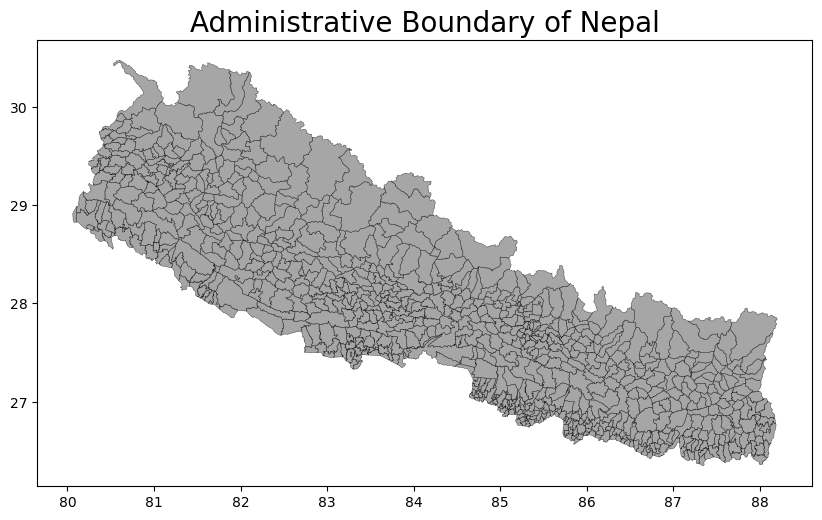

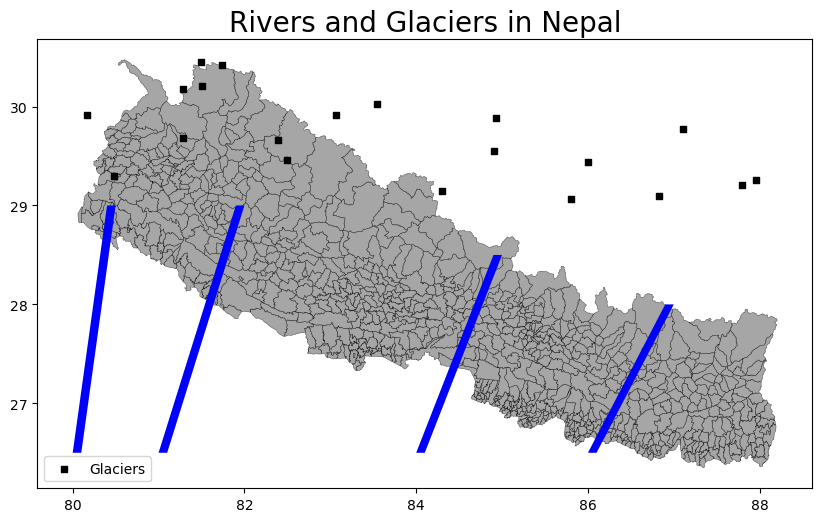

In [59]:
#Read file locations of data
admin_boundaries_path = r"C:/Users/ASUS/Desktop/Data Science & ML/Assignments/Assignment 5/gis-data-science-assignment-vishalstha/Nepal_Climate_change_data/Shape_Data/local_unit.shp"
rivers_path = r"C:\Users\ASUS\Desktop\Data Science & ML\Assignments\Assignment 5\gis-data-science-assignment-vishalstha\Nepal_Climate_change_data\nepal_climate_data\nepal_rivers.gpkg"
glaciers_path = r"C:\Users\ASUS\Desktop\Data Science & ML\Assignments\Assignment 5\gis-data-science-assignment-vishalstha\Nepal_Climate_change_data\nepal_climate_data\nepal_glaciers.gpkg"
temperature_2020_path = r"C:\Users\ASUS\Desktop\Data Science & ML\Assignments\Assignment 5\gis-data-science-assignment-vishalstha\Nepal_Climate_change_data\nepal_climate_data\nepal_temperature_2020.tif"
temperature_2050_path = r"C:\Users\ASUS\Desktop\Data Science & ML\Assignments\Assignment 5\gis-data-science-assignment-vishalstha\Nepal_Climate_change_data\nepal_climate_data\nepal_temperature_2050.tif"
precipitation_2020_path = r"C:\Users\ASUS\Desktop\Data Science & ML\Assignments\Assignment 5\gis-data-science-assignment-vishalstha\Nepal_Climate_change_data\nepal_climate_data\nepal_precipitation_2020.tif"
precipitation_2050_path = r"C:\Users\ASUS\Desktop\Data Science & ML\Assignments\Assignment 5\gis-data-science-assignment-vishalstha\Nepal_Climate_change_data\nepal_climate_data\nepal_precipitation_2050.tif"


#Read Vector Data
admin_boundary = gpd.read_file(admin_boundaries_path)
rivers_data = gpd.read_file(rivers_path)
glaciers_data = gpd.read_file(glaciers_path)

#Read Raster Data
temperature_2020_data = rasterio.open(temperature_2020_path)
temperature_2050_data = rasterio.open(temperature_2050_path)
precipitation_2020_data = rasterio.open(precipitation_2020_path)
precipitation_2050_data = rasterio.open(precipitation_2050_path)


#Check CRS of different dataset
print(admin_boundary.crs)
print(rivers_data.crs)
print(glaciers_data.crs)

#Convert CRS to same type for all dataset
admin_boundary = admin_boundary.to_crs(rivers_data.crs)
print(admin_boundary.crs)



#Plot administrative boundary of nepal
admin_boundary.plot(figsize=(10,6), color="grey", alpha=0.7, edgecolor="black", linewidth=0.3)
plt.title("Administrative Boundary of Nepal", fontsize = 20)

#Plot rivers and galciers in Nepal map
fig,ax = plt.subplots(figsize=(10,6)) 
admin_boundary.plot(ax = ax, color="grey", alpha=0.7, edgecolor="black", linewidth=0.3) #plot administrative boundaries
rivers_data.plot(ax = ax, color="blue", linewidth=0.5, label="Rivers") #plot rivers
glaciers_data.plot(ax = ax, color = "black", label="Glaciers", marker = 's', markersize=15) #plot glaciers
ax.legend(loc = "lower left")
ax.set_title("Rivers and Glaciers in Nepal", fontsize =  20)

plt.show()

Data Visualization

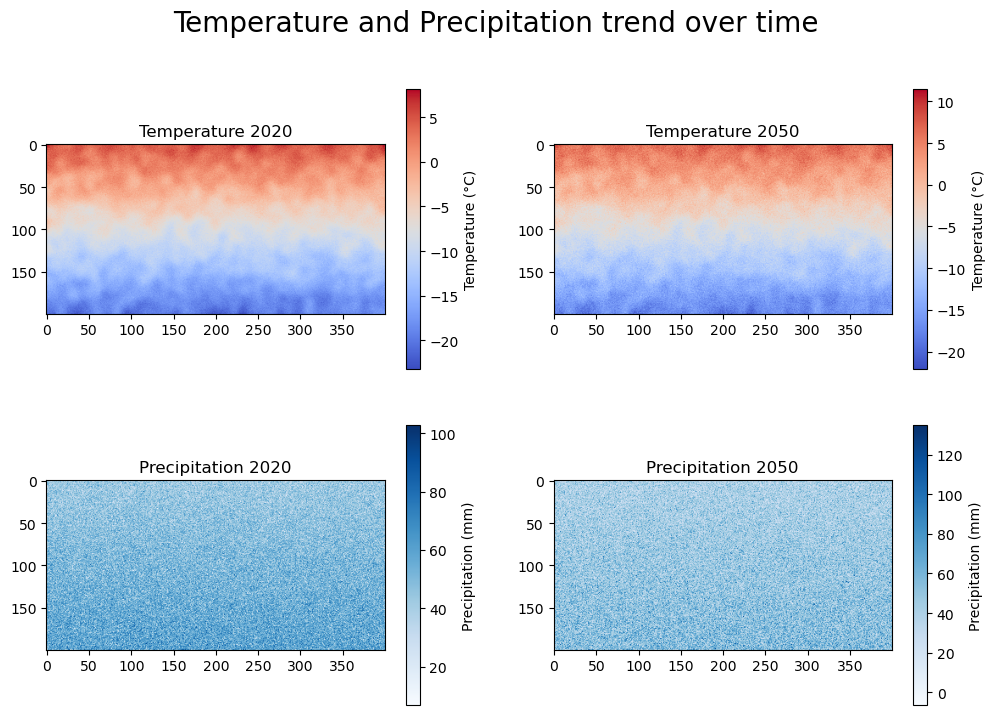

In [60]:
#Visualize Temperature and Precipitation trend over time
fig, ax = plt.subplots(2,2, figsize=(12,8))  #create 2*2 subplot
fig.suptitle("Temperature and Precipitation trend over time", fontsize = 20)

#Plot Temperature Data
img1 = ax[0,0].imshow(temperature_2020_data.read(1), cmap ="coolwarm")
ax[0,0].set_title("Temperature 2020", fontsize=12)
cbar1 = fig.colorbar(img1)
cbar1.set_label("Temperature (°C)")

img1 = ax[0,1].imshow(temperature_2050_data.read(1), cmap ="coolwarm")
ax[0,1].set_title("Temperature 2050", fontsize=12)
cbar1 = fig.colorbar(img1)
cbar1.set_label("Temperature (°C)")

#Plot Precipitation Data
img1 = ax[1,0].imshow(precipitation_2020_data.read(1), cmap="Blues")
ax[1,0].set_title("Precipitation 2020", fontsize=12)
cbar1 = fig.colorbar(img1)
cbar1.set_label("Precipitation (mm)")

img1 = ax[1,1].imshow(precipitation_2050_data.read(1), cmap="Blues")
ax[1,1].set_title("Precipitation 2050", fontsize=12)
cbar1 = fig.colorbar(img1)
cbar1.set_label("Precipitation (mm)")


Visualize Temperature trend over time

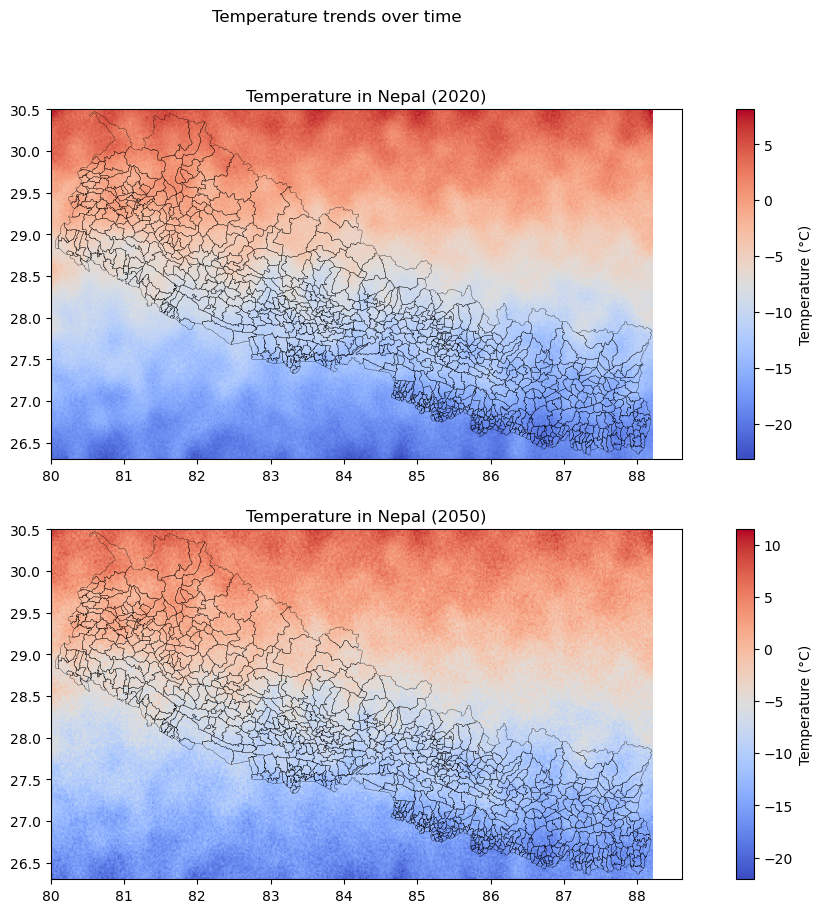

In [ ]:
#Create 2*2 subplot
fig,axes = plt.subplots(2,1,figsize=(14,10))
fig.suptitle("Temperature trends over time ")

#Plot temperature data of 2020 over map of nepal
show(temperature_2020_data, ax=axes[0], cmap="coolwarm")
admin_boundary.plot(ax=axes[0], facecolor="none", edgecolor="black", linewidth=0.2)
axes[0].set_title("Temperature in Nepal (2020)")
cbar1 = fig.colorbar(axes[0].images[0], ax=axes[0])
cbar1.set_label("Temperature (°C)")

#Plot temperature data of 2050 over map of nepal
show(temperature_2050_data, ax=axes[1], cmap="coolwarm")
admin_boundary.plot(ax=axes[1], facecolor="none", edgecolor="black", linewidth=0.2)
axes[1].set_title("Temperature in Nepal (2050)")
cbar1 = fig.colorbar(axes[1].images[0], ax=axes[1])
cbar1.set_label("Temperature (°C)")

Visualize Precipitation trend over time

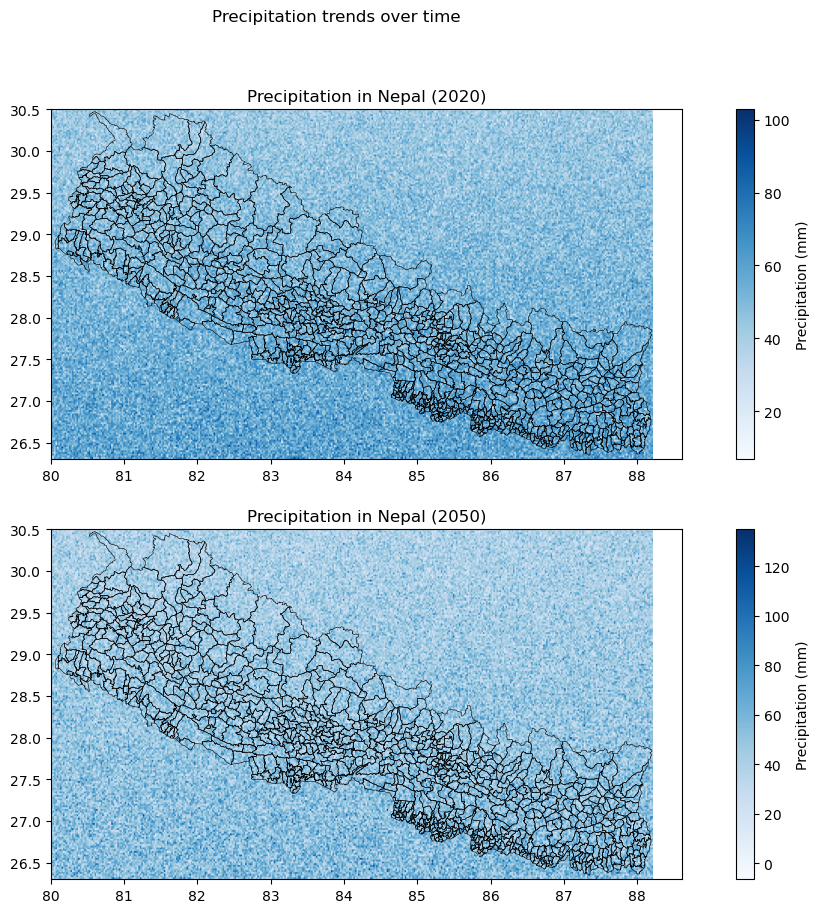

In [ ]:
#Create 2*2 subplot
fig,axes = plt.subplots(2,1,figsize=(14,10))
fig.suptitle("Precipitation trends over time ")

#Plot Precipitation data of 2020 over map of nepal
show(precipitation_2020_data, ax=axes[0], cmap="Blues")
admin_boundary.plot(ax=axes[0], facecolor="none", edgecolor="black", linewidth=0.4)
axes[0].set_title("Precipitation in Nepal (2020)")
cbar1 = fig.colorbar(axes[0].images[0], ax=axes[0])
cbar1.set_label("Precipitation (mm)")

#Plot Precipitation data of 2050 over map of nepal
show(precipitation_2050_data, ax=axes[1], cmap="Blues")
admin_boundary.plot(ax=axes[1], facecolor="none", edgecolor="black", linewidth=0.4)
axes[1].set_title("Precipitation in Nepal (2050)")
cbar1 = fig.colorbar(axes[1].images[0], ax=axes[1])
cbar1.set_label("Precipitation (mm)")

Precipitation visualization shows that rainfall is likely to decrease with time till year 2050 compared to year 2020.

Exploratory Data Analysis (EDA)

In [63]:
# EDA of Vector Data

#Check data types and missing values
admin_boundary.info()

#Check length of data
print(len(admin_boundary))
print(len(rivers_data))
print(len(glaciers_data))

#Check CRS of different dataset
print(admin_boundary.crs)
print(rivers_data.crs)
print(glaciers_data.crs)


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATE_CODE  777 non-null    int32   
 1   DISTRICT    777 non-null    object  
 2   GaPa_NaPa   777 non-null    object  
 3   Type_GN     777 non-null    object  
 4   Province    777 non-null    object  
 5   geometry    777 non-null    geometry
dtypes: geometry(1), int32(1), object(4)
memory usage: 33.5+ KB
777
4
20
EPSG:4326
EPSG:4326
EPSG:4326


In [64]:
# EDA of Administrative Boundary dataset of Nepal

print(admin_boundary.head())  #print head of dataset

#Find no of categorical data in different column of dataset
print(f"Number of Provinces: {len(admin_boundary.Province.unique())}")
print(f"Number of Districts: {len(admin_boundary.DISTRICT.unique())}")

#Calculate and print total number of local bodies in nepal
no_of_local_bodies = 0
palika_types = admin_boundary.Type_GN.unique()  #get unique palika types in a variable
for palika in palika_types:
    if palika in ["Gaunpalika" , "Nagarpalika" , "Upamahanagarpalika" , "Mahanagarpalika" ]:  #loop through palika_types to filter actual local bodies 
        no_of_local_bodies = no_of_local_bodies + admin_boundary.Type_GN.value_counts()[f'{palika}']
print(f"Number of Local Bodies/Governments: {no_of_local_bodies}")

#List of different administration division of Nepal
print(admin_boundary.Type_GN.value_counts())




   STATE_CODE   DISTRICT        GaPa_NaPa     Type_GN Province  \
0           1  TAPLEJUNG  Aathrai Tribeni  Gaunpalika        1   
1           1  TAPLEJUNG       Maiwakhola  Gaunpalika        1   
2           1  TAPLEJUNG        Meringden  Gaunpalika        1   
3           1  TAPLEJUNG       Mikwakhola  Gaunpalika        1   
4           1  TAPLEJUNG     Phaktanglung  Gaunpalika        1   

                                            geometry  
0  POLYGON ((87.60985 27.37043, 87.61107 27.36943...  
1  POLYGON ((87.50402 27.42901, 87.50672 27.42831...  
2  POLYGON ((87.51272 27.56894, 87.51255 27.56859...  
3  POLYGON ((87.6885 27.70975, 87.68891 27.70938,...  
4  POLYGON ((87.83673 27.95137, 87.83735 27.95119...  
Number of Provinces: 7
Number of Districts: 77
Number of Local Bodies/Governments: 755
Type_GN
Gaunpalika                        461
Nagarpalika                       277
Upamahanagarpalika                 11
National Park                      11
Mahanagarpalika           

In [65]:
# EDA of Rivers and Glacier dataset

#Print head of dataset
print(rivers_data.head())
print(glaciers_data.head())

#Print description of dataset (Show total data count, min, max, mean, standard deviation)
print(rivers_data.describe())
print(glaciers_data.describe())



       name  flow_2020  flow_2050  flow_reduction_pct  \
0     Koshi       2200       2000            9.090909   
1   Gandaki       1800       1650            8.333333   
2   Karnali       1600       1400           12.500000   
3  Mahakali       1200       1050           12.500000   

                                            geometry  
0  POLYGON ((86 26.5, 86.1 26.5, 87 28, 86.9 28, ...  
1  POLYGON ((84 26.5, 84.1 26.5, 85 28.5, 84.9 28...  
2  POLYGON ((81 26.5, 81.1 26.5, 82 29, 81.9 29, ...  
3  POLYGON ((80 26.5, 80.1 26.5, 80.5 29, 80.4 29...  
     id  retreat_2020  retreat_2050  increase_pct                   geometry
0  GL01     11.830574     18.308859     54.758846  POINT (83.07123 29.91778)
1  GL02     10.515828     18.451705     75.466020  POINT (87.79586 29.20924)
2  GL03     13.881700     22.644677     63.126114  POINT (86.00235 29.43822)
3  GL04     14.675666     22.894538     56.003401    POINT (84.909 29.54954)
4  GL05     18.200654     25.343086     39.242723   PO

In [66]:
#Calculate and Print number of rivers and galciers 
print(f"No. of Rivers in Nepal: {len(rivers_data.name.unique())}")
print(f"NO. of Glaciers in Nepal: {len(glaciers_data.id.unique())}")


#Calculate and Print total flow of water in rivers in 2020 and 2025
print(f"Flow of water in river in 2020: {rivers_data["flow_2020"].sum()}")
print(f"Flow of water in river in 2050: {rivers_data["flow_2050"].sum()}")

#Calcualte and Print average flow of water in rivers in 2020 and 2025
print(f"Average Flow of water in river in 2020: {rivers_data["flow_2020"].mean()}")
print(f"Average Flow of water in river in 2050: {rivers_data["flow_2050"].mean()}")


No. of Rivers in Nepal: 4
NO. of Glaciers in Nepal: 20
Flow of water in river in 2020: 6800
Flow of water in river in 2050: 6100
Average Flow of water in river in 2020: 1700.0
Average Flow of water in river in 2050: 1525.0


EDA of Raster Dataset

<Axes: >

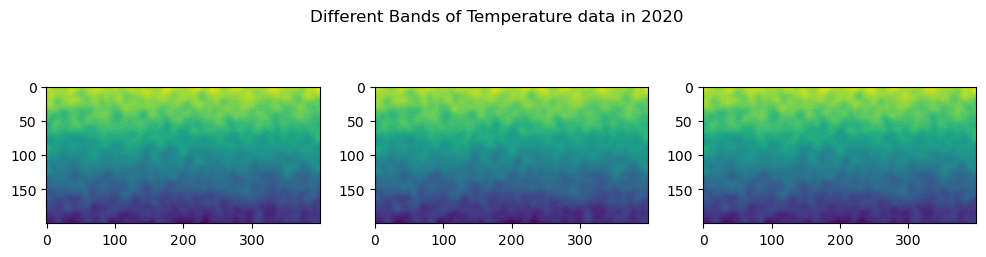

In [67]:
#Read different bands and visualize temperature in 2020
read1 = temperature_2020_data.read(1)
read2 = temperature_2020_data.read(2)
read3 = temperature_2020_data.read(3)

fig, ax = plt.subplots(1,3, figsize=(12,3))
fig.suptitle("Different Bands of Temperature data in 2020")

show(read1, ax= ax[0])
show(read2, ax=ax[1])
show(read3, ax=ax[2])

<Axes: >

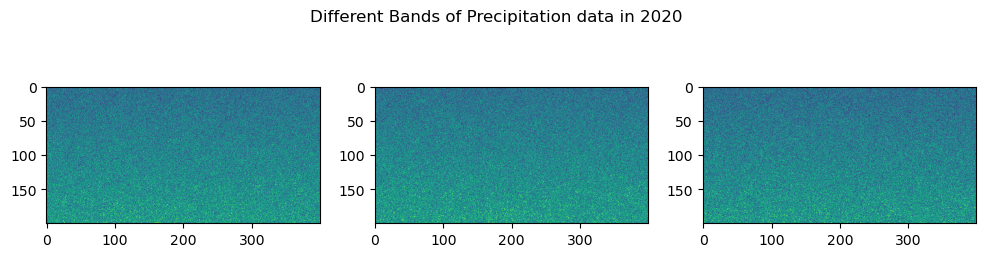

In [68]:
#Read different bands and visualize precipitation in 2020
read1 = precipitation_2020_data.read(1)
read2 = precipitation_2020_data.read(2)
read3 = precipitation_2020_data.read(3)

fig, ax = plt.subplots(1,3, figsize = (12,3))
fig.suptitle("Different Bands of Precipitation data in 2020")
show(read1, ax=ax[0])
show(read2, ax=ax[1])
show(read3, ax=ax[2])
